In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as Im
import scipy.optimize as opt
#plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb}'

%matplotlib inline

Frequency Trial 1: 50 Hz


Frequency Trial 2: 120 Hz


Frequency Trial 3: 240 Hz

In [330]:
fieldData = pd.read_excel("./data/data1.xlsx") #Read the data
distanceData = pd.read_excel("./data/distance.xlsx")
d = distanceData["Distance (cm)"]
dd = []
for n in range(0,len(d)):
    dd.append(0.1)
B = fieldData["B (mT)"]
t = fieldData["Time (s)"]
d

0     0.0
1     0.2
2     0.4
3     0.6
4     0.8
5     1.0
6     1.2
7     1.4
8     1.6
9     1.8
10    2.0
11    2.2
12    2.4
13    2.6
14    2.8
15    3.0
16    3.2
17    3.4
18    3.6
Name: Distance (cm), dtype: float64

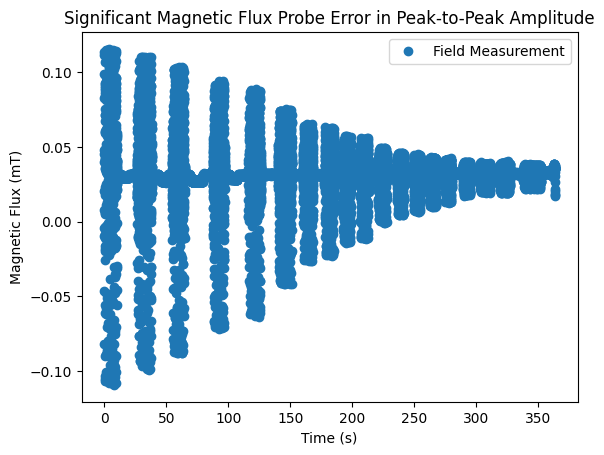

In [331]:
plot = plt.errorbar(t,B,fmt="o",label="Field Measurement")
ax = plt.gca()
#ax.set_xlim([340, 400])
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Flux (mT)") 
plt.legend()
plt.title("Significant Magnetic Flux Probe Error in Peak-to-Peak Amplitude")
plt.show(plot)

In [332]:
x_starts = [1, 28, 57, 89, 118, 142, 162, 180, 193, 208, 222, 237, 250, 263, 275, 290, 304, 320, 340]
x_ends = [8, 35, 62, 96, 125, 150, 167, 185, 198, 212, 227, 241, 254, 267, 279, 295, 310, 326, 349]

B_amp = []

for start, end in zip(x_starts, x_ends):
    interval = (t >= start) & (t <= end)
    
    # Get B values in that interval
    B_segment = B[interval]
    
    amplitude = np.max(B_segment) - np.min(B_segment)
    
    B_amp.append(amplitude)

# Convert to numpy array if needed
B_amp = np.array(B_amp)
dB_amp = B_amp * 0.1
dB1_norm = np.sqrt((B_amp * dB_amp[0]/B_amp[0]**2)**2 + (dB_amp / B_amp[0])**2)
B1_norm = B_amp / B_amp[0]

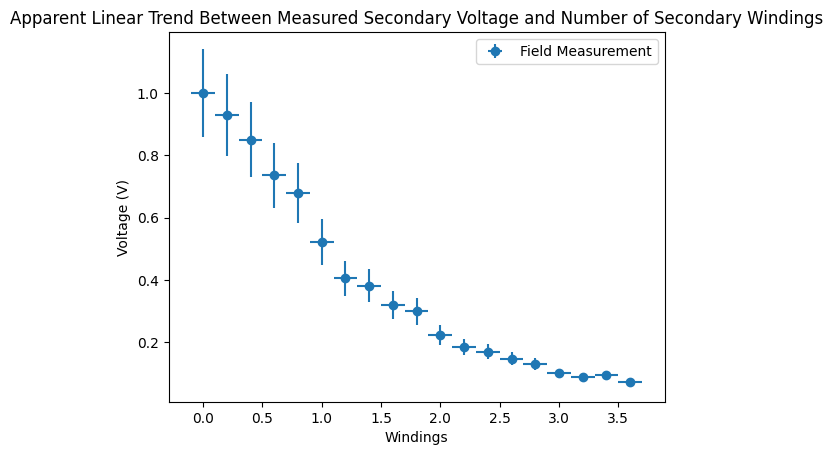

In [333]:
plot = plt.errorbar(d,B1_norm,xerr=dd,yerr=dB1_norm,fmt="o",label="Field Measurement")
plt.xlabel("Windings")
plt.ylabel("Voltage (V)") 
plt.legend()
plt.title("Apparent Linear Trend Between Measured Secondary Voltage and Number of Secondary Windings")
plt.show(plot)

In [334]:
fieldData = pd.read_excel("./data/data2.xlsx") #Read the data
B = fieldData["B (mT)"]
t = fieldData["Time (s)"]
fieldData

,Time (s),B (mT)
0,0.00,0.036089
1,0.02,0.035639
2,0.04,0.035939
3,0.06,0.035939
4,0.08,0.035489
...,...,...
21135,422.70,0.036238
21136,422.72,0.036539
21137,422.74,0.036688
21138,422.76,0.036688


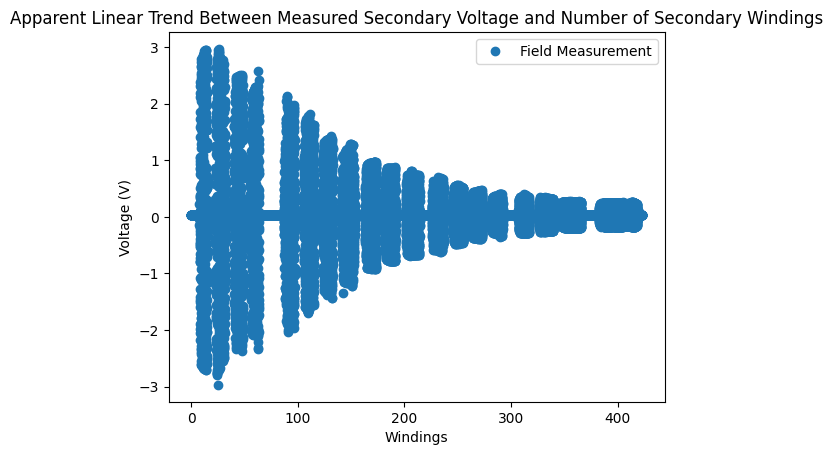

In [335]:
plot = plt.errorbar(t,B,fmt="o",label="Field Measurement")
ax = plt.gca()
#ax.set_xlim([380, 450])
plt.xlabel("Windings")
plt.ylabel("Voltage (V)") 
plt.legend()
plt.title("Apparent Linear Trend Between Measured Secondary Voltage and Number of Secondary Windings")
plt.show(plot)

In [336]:
x_starts = [10, 28, 43, 58, 92, 107, 125, 144, 165, 185, 208, 228, 248, 265, 283, 308, 330, 350, 390]
x_ends = [14, 30, 47, 61, 96, 110, 130, 147, 172, 190, 213, 235, 255, 270, 287, 312, 338, 358, 400]

B_amp = []

for start, end in zip(x_starts, x_ends):
    interval = (t >= start) & (t <= end)
    
    # Get B values in that interval
    B_segment = B[interval]
    
    amplitude = np.max(B_segment) - np.min(B_segment)
    
    B_amp.append(amplitude)

# Convert to numpy array if needed
B_amp = np.array(B_amp)
dB_amp = B_amp * 0.1
dB2_norm = np.sqrt((B_amp * dB_amp[0]/B_amp[0]**2)**2 + (dB_amp / B_amp[0])**2)
B2_norm = B_amp / B_amp[0]

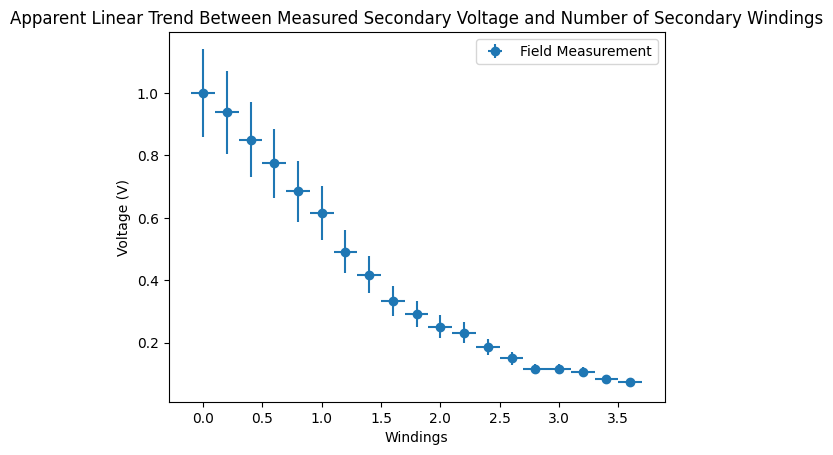

In [337]:
plot = plt.errorbar(d,B2_norm,xerr=dd,yerr=dB2_norm,fmt="o",label="Field Measurement")
plt.xlabel("Windings")
plt.ylabel("Voltage (V)") 
plt.legend()
plt.title("Apparent Linear Trend Between Measured Secondary Voltage and Number of Secondary Windings")
plt.show(plot)

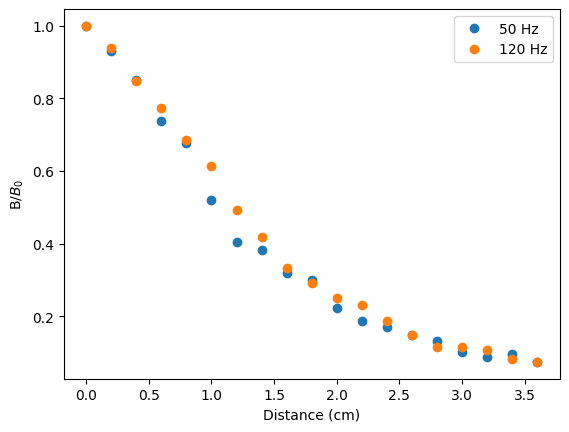

In [338]:
fig, ax = plt.subplots()

ax.errorbar(d,B1_norm,fmt="o",label="50 Hz")
ax.errorbar(d,B2_norm,fmt="o", label="120 Hz")
ax.set_xlabel("Distance (cm)")
ax.set_ylabel(r"B/$B_0$")
ax.legend()
plt.show()

In [339]:
fieldData = pd.read_excel("./data/data3.xlsx") #Read the data
B = fieldData["B (mT)"]
t = fieldData["Time (s)"]
fieldData

,Time (s),B (mT)
0,0.00,0.035489
1,0.02,0.035788
2,0.04,0.035788
3,0.06,0.034288
4,0.08,0.035489
...,...,...
20085,401.70,0.035039
20086,401.72,0.034589
20087,401.74,0.034888
20088,401.76,0.034738


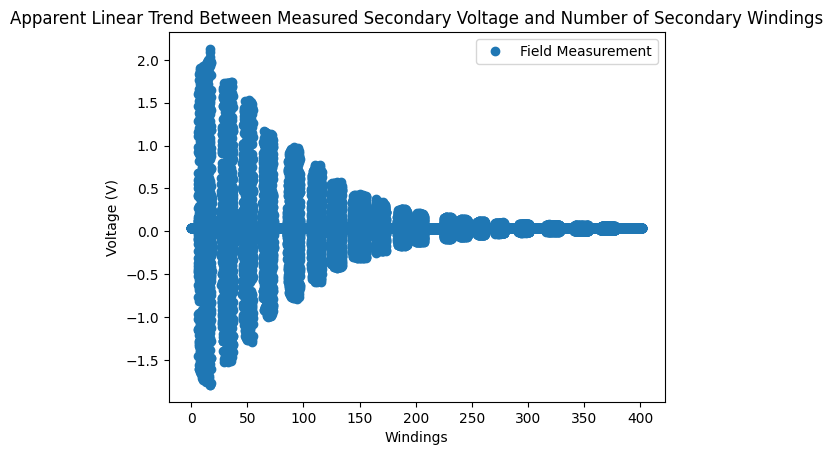

In [340]:
plot = plt.errorbar(t,B,fmt="o",label="Field Measurement")
ax = plt.gca()
#ax.set_xlim([200, 500])
plt.xlabel("Windings")
plt.ylabel("Voltage (V)") 
plt.legend()
plt.title("Apparent Linear Trend Between Measured Secondary Voltage and Number of Secondary Windings")
plt.show(plot)

In [341]:
x_starts = [8, 28, 48, 65, 88, 108, 126, 145, 166, 184, 200, 226, 240, 255, 271, 293, 318, 343, 368]
x_ends = [15, 35, 53, 72, 94, 115, 132, 155, 172, 192, 206, 231, 245, 260, 277, 300, 326, 352, 375]

B_amp = []

for start, end in zip(x_starts, x_ends):
    interval = (t >= start) & (t <= end)
    
    # Get B values in that interval
    B_segment = B[interval]
    
    amplitude = np.max(B_segment) - np.min(B_segment)
    
    B_amp.append(amplitude)

# Convert to numpy array if needed
B_amp = np.array(B_amp)
dB_amp = B_amp * 0.1
dB3_norm = np.sqrt((B_amp * dB_amp[0]/B_amp[0]**2)**2 + (dB_amp / B_amp[0])**2)
B3_norm = B_amp / B_amp[0]

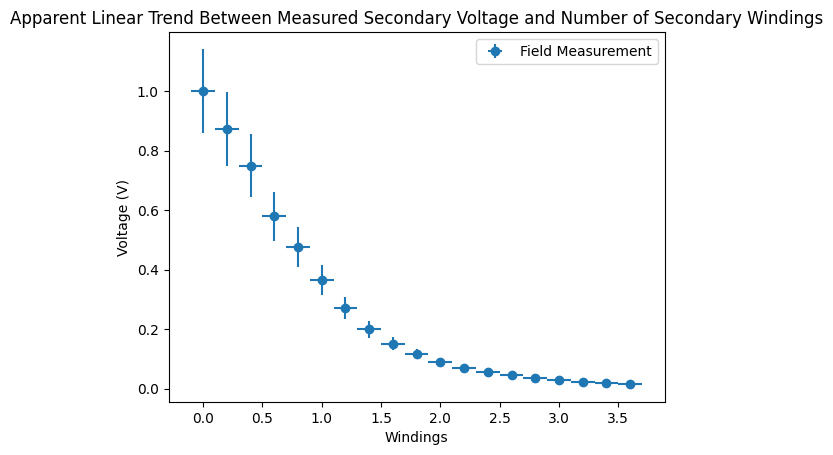

In [342]:
plot = plt.errorbar(d,B3_norm,xerr=dd,yerr=dB3_norm,fmt="o",label="Field Measurement")
plt.xlabel("Windings")
plt.ylabel("Voltage (V)") 
plt.legend()
plt.title("Apparent Linear Trend Between Measured Secondary Voltage and Number of Secondary Windings")
plt.show(plot)

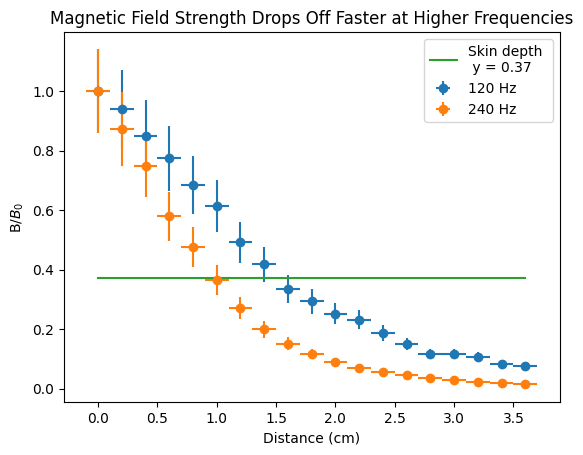

In [343]:
fig, ax = plt.subplots()

# Create x-values
x = np.linspace(0, 3.6, 100)

# Create y-values (all the same)
y = np.full_like(x, 0.37)  # y = 5 everywhere

#ax.errorbar(d,B1_norm,fmt="o",label="50 Hz")
ax.errorbar(d,B2_norm,xerr=dd,yerr=dB2_norm,fmt="o", label="120 Hz")
ax.errorbar(d,B3_norm,xerr=dd,yerr=dB3_norm,fmt="o",label="240 Hz")
ax.plot(x, y, label='Skin depth \n y = 0.37')
ax.set_xlabel("Distance (cm)")
ax.set_ylabel(r"B/$B_0$")
ax.set_title("Magnetic Field Strength Drops Off Faster at Higher Frequencies")
ax.legend()
plt.show()